Indicaciones:
- asegurarse de tener instalados todos los paquetes
- crear una carpeta llamada "tf" que contenga otra carpeta llamada "ccpps", allí se descargará la data

**=================== PARTE 1: WEB SCRAPPING ====================**

In [21]:
import pandas as pd
import numpy as np
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from io import StringIO
import os
import time
import requests
from selenium.webdriver.chrome.options import Options
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

Preparar el setup para el webscrapping

In [22]:
# declarar la ruta donde se guardará el archivo xlsx que unifica los datos
path_static = r'C:\Users\maria\Documents\qlab\webscrap\tf'
os.makedirs( path_static, exist_ok = True )

# declarar la ruta donde se guardarán los varios archivos xlsx obtenidos por cada ccpp
path_dinamic = path_static + '/ccpps'
os.makedirs( path_dinamic, exist_ok = True )

In [23]:
# Indicar las opciones deseadas del chrome driver
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
import pyautogui
import time

# Ruta donde se guardarán los archivos
download_directory = r"C:\Users\maria\Documents\qlab\webscrap\tf"

# Crear la carpeta si no existe
if not os.path.exists(download_directory):
    os.makedirs(download_directory)

# Configurar opciones de Chrome
chrome_options = Options()
chrome_options.add_argument("--start-maximized")
chrome_options.add_experimental_option("prefs", {
    "profile.default_content_settings.popups": 0,
    "download.default_directory": download_directory,  # Define la carpeta de descargas
    "download.prompt_for_download": False,
    "download.directory_upgrade": True,
    "safebrowsing.enabled": True,
    "safebrowsing.disable_download_protection": True  # Permitir descargas bloqueadas
})

# Inicializar el navegador con opciones
driver = webdriver.Chrome(service=Service(), options=chrome_options)

# Maximizar ventana
driver.maximize_window()

In [24]:
# indicar la URL que deseamos scrappear
url = "http://sige.inei.gob.pe/test/atlas/"

# Abrir el navegador de chrome en esa URL
driver.get(url) 

Determinar coordenadas donde se harán los  clics para la descarga de datos.
- **OJO:**
- Los valores guardados en este código están adaptados a pantallas de 1920 x 1080. Si la pantalla actual es de ese tamaño, Pasar al bloque "Bucle que descarga data de los centros poblados desde la web"
- Si la pantalla donde se ejecuta este código es de tamaño distinto, ejecutar los siguientes bloques 

In [11]:
# Importamos las bibliotecas necesarias
import pyautogui  # Para obtener la posición del cursor del mouse
import keyboard  # Para detectar pulsaciones de teclas
import time  # Para manejar tiempos y pausas en la ejecución

In [12]:
# Inicializamos una variable para controlar el tiempo entre capturas
stop = 0  # Se usa para evitar múltiples capturas seguidas

print("Presiona 'z' para capturar la posición del cursor. Presiona 'Esc' para salir.")

Presiona 'z' para capturar la posición del cursor. Presiona 'Esc' para salir.


Seguir estas instrucciones: 
1. cambiar a la ventana abierta en chrome,
2. Seleccionar Departameno: Huánuco,
3. Seleccionar Provincia: Dos de mayo,
4. Seleccionar distrito: Chuquis,
5. Seleccionar el primer centro poblado de la lista.
6. ejecutar el bloque de código.
7. Hacer clic en el punto del centro poblado, presionar la tecla 'z',
8. clic en el botón "salir", presionar 'z',
9. Presionar la tecla 'Esc' del teclado. Las coordenadas de ambos clics se guardarán y usarán más adelante.

In [13]:
# Lista para almacenar coordenadas
capturas2 = [] 

# Bucle infinito que mantiene el programa en ejecución
while True:
    start = time.time()  # Guarda el tiempo actual en segundos
    
    # Verificamos si la tecla 'z' ha sido presionada y si ha pasado más de 1 segundo desde la última captura
    if keyboard.is_pressed('z') and (start - stop) > 1:
        
        # Captura la posición actual del cursor del mouse
        position = pyautogui.position()

        # Agregar coordenadas a la lista
        capturas2.append((position.x, position.y))
        
        # Muestra las coordenadas X e Y en la terminal
        print(f"Coordenadas capturadas: X = {position.x}, Y = {position.y}")
        
        # Actualiza el tiempo de la última captura para evitar registros duplicados
        stop = time.time()

    # Permitir salir del script con 'ESC'
    if keyboard.is_pressed('esc'):
        print("Salida manual detectada. Finalizando el programa.")
        break
    
    # Pequeña pausa para reducir el uso de CPU y mejorar la eficiencia del script
    time.sleep(0.1)

Coordenadas capturadas: X = 1191, Y = 695
Coordenadas capturadas: X = 600, Y = 959
Salida manual detectada. Finalizando el programa.


In [14]:
capturas2

[(1191, 695), (600, 959)]

Al finalizar el bloque anterior se habrá obtenido una lista con 2 elementos: [coordenada1] y [coordenada2] que se deberán reemplazar donde el código lo indique

**Bucle que descarga data de los centros poblados desde la web**
- Aquí se reemplazan las coordenadas obtenidas pasos atrás, si la pantalla es de tamaño distinto a 1920 x 1080
- Si la pantalla es de 1920 x 1080, no se necesita cambiar nada en el código

In [7]:

time.sleep(5) # 5 segundos para cambiar manualmente de ventana al navegador de chrome abierto previamente

import random
# Fijar la semilla para reproducibilidad
random.seed(123)

# Seleccionar HUANUCO en el combo de Departamento
departamentos = Select(driver.find_element(By.ID, "cboDepartamento"))
departamentos.select_by_visible_text("HUANUCO")
time.sleep(2)

# Seleccionar LA UNION en el combo de Provincia
provincias = Select(driver.find_element(By.ID, "cboProvincia"))
provincias.select_by_visible_text("DOS DE MAYO")
time.sleep(2)

# Obtener la lista de distritos en la provincia
distritos = Select(driver.find_element(By.ID, "cboDistrito"))
distrito_options = distritos.options[1:]  # Ignorar la primera opción que suele ser "Seleccione"

# Contar y mostrar cuántos centros poblados hay
print(f"Número total de distritos: {len(distrito_options)}")

# Obtener y mostrar los nombres de los centros poblados
nombres_distritos = [distrito.text for distrito in distrito_options]
print("Distritos de la provincia:", nombres_distritos)

# Iterar sobre todos los distritos
for distrito in distrito_options:
    distritos.select_by_visible_text(distrito.text)
    print(f"Seleccionando distrito: {distrito.text}")
    time.sleep(5)  # Esperar a que carguen los centros poblados

    # Obtener la lista de centros poblados en el distrito
    centros_poblados = driver.find_elements(By.XPATH, "//a[contains(@href, 'mapa_centropoblado')]")

    # Contar y mostrar cuántos centros poblados hay
    print(f"En {distrito.text} el número total de centros poblados es {len(centros_poblados)}")

    # Seleccionar 3 centros poblados al azar
    centros_seleccionados = random.sample(centros_poblados, min(3, len(centros_poblados)))
    print(f"Centros poblados seleccionados en {distrito.text}:", [centro.text for centro in centros_seleccionados])
    
    # Iterar solo sobre los centros poblados seleccionados
    for centro in centros_seleccionados:
        try:
            # Hacer clic en el centro poblado
            centro.click()
            time.sleep(3)  # Esperar a que cargue el centro poblado en el mapa

            # Mover el mouse a {coordenadas 1} y hacer doble clic para desplegar información
            pyautogui.moveTo(1191, 695, duration=0.5) # <------------REEMPLAZAR AQUI
            pyautogui.doubleClick()
            time.sleep(3)  # Esperar a que aparezca la información

            # Insertar el xpath de la tabla buscada
            table_element = driver.find_element(By.ID, "tblArea_informacion")
            table_html = table_element.get_attribute('outerHTML')
            table_html_io = StringIO(table_html)

            # Traducir la tabla html a un dataframe
            table_df = pd.read_html(table_html_io)[0]

            # Determinar la ruta dinámica donde se quiere guardar la tabla correspondiente
            path_table = path_dinamic + f'/tabla_{distrito.text}_{centro.text}.xlsx'
            # Guardar el dataframe en el archivo de excel correspondiente según la numeración
            table_df.to_excel(path_table, index=False)
            print(f"Archivo {centro.text}.xlsx guardado con éxito")

            # Mover el mouse a {coordenadas 2} y hacer salir al siguiente
            pyautogui.moveTo(602, 960, duration=0.5) # <------------REEMPLAZAR AQUI
            pyautogui.click()
            time.sleep(5)  # Esperar a que la descarga se complete antes de continuar

        except Exception as e:
            print(f"Error con {centro.text} en {distrito.text}: {e}")

print("Extracción finalizada.")


Número total de distritos: 9
Distritos de la provincia: ['CHUQUIS', 'LA UNION', 'MARIAS', 'PACHAS', 'QUIVILLA', 'RIPAN', 'SHUNQUI', 'SILLAPATA', 'YANAS']
Seleccionando distrito: CHUQUIS
En CHUQUIS el número total de centros poblados es 80
Centros poblados seleccionados en CHUQUIS: ['', 'SHIURICO', 'USHPAPAMPA']
Error con  en CHUQUIS: Message: element not interactable
  (Session info: chrome=134.0.6998.178)
Stacktrace:
	GetHandleVerifier [0x00007FF6CF2B4C25+3179557]
	(No symbol) [0x00007FF6CEF188A0]
	(No symbol) [0x00007FF6CEDA8FFC]
	(No symbol) [0x00007FF6CEE00EA4]
	(No symbol) [0x00007FF6CEDF2A24]
	(No symbol) [0x00007FF6CEE27C2A]
	(No symbol) [0x00007FF6CEDF22D6]
	(No symbol) [0x00007FF6CEE27E40]
	(No symbol) [0x00007FF6CEE502F3]
	(No symbol) [0x00007FF6CEE27A03]
	(No symbol) [0x00007FF6CEDF06D0]
	(No symbol) [0x00007FF6CEDF1983]
	GetHandleVerifier [0x00007FF6CF3167CD+3579853]
	GetHandleVerifier [0x00007FF6CF32D1D2+3672530]
	GetHandleVerifier [0x00007FF6CF322153+3627347]
	GetHandleVe

**-------- PARTE 2: Consolidar en 1 base de datos los elemento descargados --------**

In [25]:
#busca archivos de la carpeta donde se guardaron los excels
files = os.listdir(path_dinamic)
files

['tabla_CHUQUIS_SAN FRANCISCO DE CASHA.xlsx',
 'tabla_CHUQUIS_SHIURICO.xlsx',
 'tabla_CHUQUIS_USHPAPAMPA.xlsx',
 'tabla_LA UNION_HUEGUETOG.xlsx',
 'tabla_LA UNION_PUEBLO VIEJO.xlsx',
 'tabla_LA UNION_YANAN PAMPA LLAMPAS.xlsx',
 'tabla_MARIAS_MARAY.xlsx',
 'tabla_MARIAS_MARIAS PAMPA.xlsx',
 'tabla_MARIAS_TANTACOTO.xlsx',
 'tabla_PACHAS_CAJON PUQUIO.xlsx',
 'tabla_PACHAS_COLLOTA.xlsx',
 'tabla_PACHAS_HUANZAYLO.xlsx',
 'tabla_QUIVILLA_ERA PATA.xlsx',
 'tabla_QUIVILLA_GITANA.xlsx',
 'tabla_QUIVILLA_ICHIC RUPA HUAIN.xlsx',
 'tabla_RIPAN_ICHIC LLEGLLISH.xlsx',
 'tabla_RIPAN_PITEG.xlsx',
 'tabla_RIPAN_SHAPAN HUANCA.xlsx',
 'tabla_SHUNQUI_PUCUTIN.xlsx',
 'tabla_SHUNQUI_SHUNQUI.xlsx',
 'tabla_SHUNQUI_TANTASH.xlsx',
 'tabla_SILLAPATA_CHALIACO.xlsx',
 'tabla_SILLAPATA_CHIPTAC.xlsx',
 'tabla_SILLAPATA_CULEG CHICO.xlsx',
 'tabla_YANAS_CUNCAYOC.xlsx',
 'tabla_YANAS_PACAY.xlsx',
 'tabla_YANAS_YANAS.xlsx']

In [26]:
#crear dataframe vacío donde se guardará la información de interés
datos_df = pd.DataFrame(columns=["distrito","ccpp", "time_cap", "dist_salud"]) 

# Bucle: abrir cada archivo de la lista
for i, file in enumerate(files):
    data = pd.read_excel(f"{path_dinamic}/{file}")
    print(f" Trabajando con {file}")

    # seleccionar la data deseada
    capital = data.iloc[18,1] # minutos a capital del distrito
    pueblo = data.iloc[4,1]
    district = data.iloc[3,1]
    salud = data.iloc[21,1] # centro de salud km

    # Agregar la data de ese ccpp a una nueva fila del dataframe
    datos_df.loc[i] = [district, pueblo, capital, salud]

 Trabajando con tabla_CHUQUIS_SAN FRANCISCO DE CASHA.xlsx
 Trabajando con tabla_CHUQUIS_SHIURICO.xlsx
 Trabajando con tabla_CHUQUIS_USHPAPAMPA.xlsx
 Trabajando con tabla_LA UNION_HUEGUETOG.xlsx
 Trabajando con tabla_LA UNION_PUEBLO VIEJO.xlsx
 Trabajando con tabla_LA UNION_YANAN PAMPA LLAMPAS.xlsx
 Trabajando con tabla_MARIAS_MARAY.xlsx
 Trabajando con tabla_MARIAS_MARIAS PAMPA.xlsx
 Trabajando con tabla_MARIAS_TANTACOTO.xlsx
 Trabajando con tabla_PACHAS_CAJON PUQUIO.xlsx
 Trabajando con tabla_PACHAS_COLLOTA.xlsx
 Trabajando con tabla_PACHAS_HUANZAYLO.xlsx
 Trabajando con tabla_QUIVILLA_ERA PATA.xlsx
 Trabajando con tabla_QUIVILLA_GITANA.xlsx
 Trabajando con tabla_QUIVILLA_ICHIC RUPA HUAIN.xlsx
 Trabajando con tabla_RIPAN_ICHIC LLEGLLISH.xlsx
 Trabajando con tabla_RIPAN_PITEG.xlsx
 Trabajando con tabla_RIPAN_SHAPAN HUANCA.xlsx
 Trabajando con tabla_SHUNQUI_PUCUTIN.xlsx
 Trabajando con tabla_SHUNQUI_SHUNQUI.xlsx
 Trabajando con tabla_SHUNQUI_TANTASH.xlsx
 Trabajando con tabla_SILLAPATA_

In [5]:
# exportar el dataframe a un archivo excel
datos_df.to_excel(f"{path_static}/datos.xlsx", index=False)

In [16]:
#En caso de correr desde aquí
# Abrir dataframe datos_df desde excel guardado
#datos_df = pd.read_excel(f"{path_static}/datos.xlsx")

In [27]:
datos_df.info()
#Si este output indica que time_cap y dist_salud son de tipo numerico, saltar el siguiente codigo

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   distrito    27 non-null     object
 1   ccpp        27 non-null     object
 2   time_cap    27 non-null     object
 3   dist_salud  27 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [28]:
#si time_cap y dist_salud son de tipo object, correr este código
datos_df["time_cap"] = pd.to_numeric(datos_df["time_cap"])
datos_df["dist_salud"] = pd.to_numeric(datos_df["dist_salud"])

In [29]:
datos_df

,distrito,ccpp,time_cap,dist_salud
0,CHUQUIS,SAN FRANCISCO DE CASHA,0,9.26
1,CHUQUIS,SHIURICO,60,9.05
2,CHUQUIS,USHPAPAMPA,120,3.65
3,LA UNION,HUEGUETOG,70,8.65
4,LA UNION,PUEBLO VIEJO,40,1.06
5,LA UNION,YANAN PAMPA LLAMPAS,180,18.47
6,MARIAS,MARAY,240,7.53
7,MARIAS,MARIAS PAMPA,30,8.29
8,MARIAS,TANTACOTO,180,0.10
9,PACHAS,CAJON PUQUIO,300,17.73


**---------- PARTE 3: ANÁLISIS DE LA DATA ---------**

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

***Estudio por subgrupos: distritos***

In [21]:
# Estadísticas descriptivas a nivel de distrito
agg_data = datos_df.groupby("distrito")[["time_cap", "dist_salud"]].agg(["mean", "std", "min", "max"])
agg_data

time_cap                      dist_salud                        
                 mean         std min  max       mean       std    min    max
distrito                                                                     
CHUQUIS     60.000000   60.000000   0  120   7.320000  3.180047   3.65   9.26
LA UNION    96.666667   73.711148  40  180   9.393333  8.728770   1.06  18.47
MARIAS     150.000000  108.166538  30  240   5.306667  4.525089   0.10   8.29
PACHAS     215.000000  147.224319  45  300  19.226667  8.474706  11.60  28.35
QUIVILLA    20.000000   10.000000  10   30   5.950000  6.150024   0.93  12.81
RIPAN      133.333333   45.092498  90  180   6.210000  2.465299   4.02   8.88
SHUNQUI     65.000000   76.974022   0  150   2.843333  2.597736   0.11   5.28
SILLAPATA   76.666667  102.510162  15  195   3.576667  1.719079   1.93   5.36
YANAS       25.000000   22.912878   0   45   3.576667  4.493110   0.48   8.73

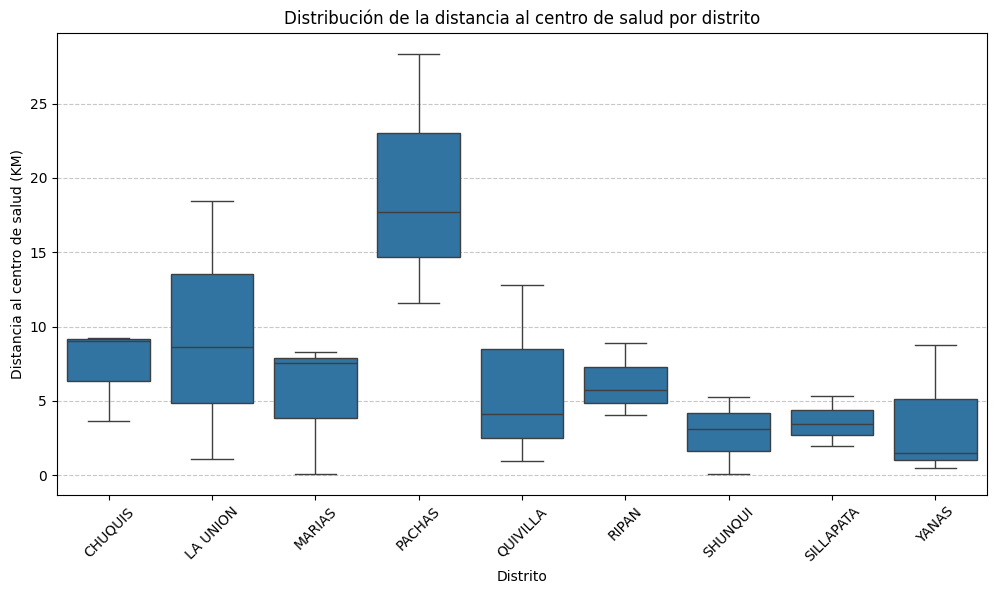

In [24]:
#boxplots por cada distrito

# Crear boxplot por distrito
plt.figure(figsize=(12, 6))
sns.boxplot(x="distrito", y="dist_salud", data=datos_df)

# Mejorar visualización
plt.xticks(rotation=45)  # Rotar etiquetas del eje X en 45°
plt.title("Distribución de la distancia al centro de salud por distrito")
plt.xlabel("Distrito")
plt.ylabel("Distancia al centro de salud (Km)")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Agregar una ligera rejilla

plt.show()


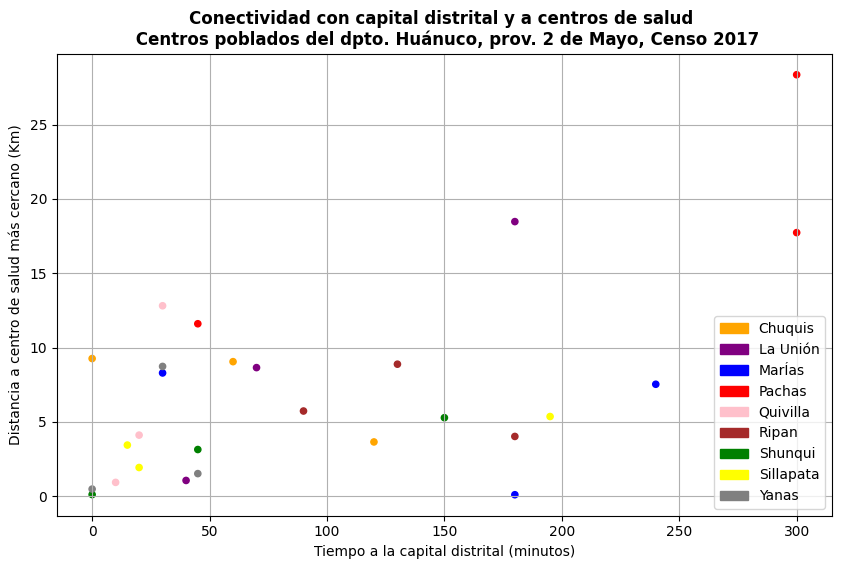

In [23]:
# Scatter plot

# Colores para cada distrito
colors = {'CHUQUIS': 'orange', 'LA UNION': 'purple', 'MARIAS': 'blue',
          'PACHAS': 'red', 'QUIVILLA': 'pink', 'RIPAN': 'brown',
          'SHUNQUI': 'green', 'SILLAPATA': 'yellow','YANAS': 'grey'}
color_list = [colors[group] for group in datos_df['distrito']]

# Crear scatter plot con puntos coloreados según distrito
ax = datos_df.plot.scatter('time_cap',
                'dist_salud',
                c=color_list,
                grid=True,
                figsize=(10,6))

# Crear leyenda de colores para cada distrito
import matplotlib.patches as mpatches
legend_handles = [
    mpatches.Patch(color=colors['CHUQUIS'], label='Chuquis'),
    mpatches.Patch(color=colors['LA UNION'], label='La Unión'), # add as many as needed
    mpatches.Patch(color=colors['MARIAS'], label='MarÍas'),
    mpatches.Patch(color=colors['PACHAS'], label='Pachas'),
    mpatches.Patch(color=colors['QUIVILLA'], label='Quivilla'),
    mpatches.Patch(color=colors['RIPAN'], label='Ripan'),
    mpatches.Patch(color=colors['SHUNQUI'], label='Shunqui'),
    mpatches.Patch(color=colors['SILLAPATA'], label='Sillapata'),
    mpatches.Patch(color=colors['YANAS'], label='Yanas'),
]
ax.legend(handles=legend_handles,
          loc='lower right')

# Añadir titulo y nombres de ejes ('\n' allow us to jump rows)
ax.set_title('Conectividad con capital distrital y a centros de salud \n Centros poblados del dpto. Huánuco, prov. 2 de Mayo, Censo 2017',
             weight='bold')
ax.set_xlabel('Tiempo a la capital distrital (minutos)')
ax.set_ylabel('Distancia a centro de salud más cercano (Km)')

plt.show()

***Matriz de correlacion***

In [31]:
correlacion = datos_df[["time_cap", "dist_salud"]].corr()
print(correlacion)

            time_cap  dist_salud
time_cap    1.000000    0.569259
dist_salud  0.569259    1.000000


In [32]:
# Matriz de correlacion por distrito
correlaciones = datos_df.groupby("distrito")[["time_cap", "dist_salud"]].corr().unstack().iloc[:, 1]
# se selecciona solo la primera fila para evitar ver la matriz cuadrada con valores duplicados
correlaciones.name = "correlacion"

print(correlaciones)

distrito
CHUQUIS     -0.882062
LA UNION     0.970173
MARIAS      -0.320862
PACHAS       0.779365
QUIVILLA     0.965850
RIPAN       -0.406148
SHUNQUI      0.947323
SILLAPATA    0.887417
YANAS        0.301360
Name: correlacion, dtype: float64


C:\Users\maria\AppData\Local\Temp\ipykernel_14416\1620098087.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlaciones.index, y=correlaciones.values, palette="coolwarm")


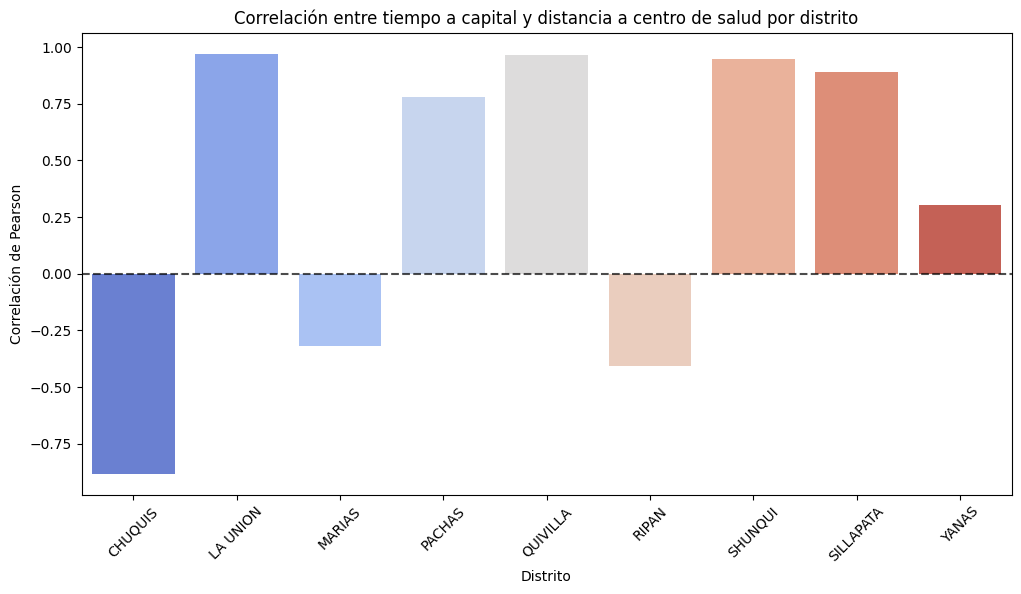

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(x=correlaciones.index, y=correlaciones.values, palette="coolwarm")

plt.xticks(rotation=45)  # Rotar nombre de ccpps 45°
plt.title("Correlación entre tiempo a capital y distancia a centro de salud por distrito")
plt.xlabel("Distrito")
plt.ylabel("Correlación de Pearson")
plt.axhline(0, color="black", linestyle="--", alpha=0.7)  # Línea de referencia eje 0
plt.show()

***Prueba de hipótesis***

In [18]:
# TEST DE HIPÓTESIS: Significancia de la correlación
import scipy.stats as stats

# Calcular correlación y p-valor
r, p_value = stats.pearsonr(datos_df["time_cap"], datos_df["dist_salud"])

print(f"correlacion de pearson:{r}")
print(f"p-value: {p_value}")

correlacion de pearson:0.569259242111153
p-value: 0.001941882965767248


H0: correlacion = 0
H1: correlacion != 0
Interpretación
- Si p_value < 0.05: se rechaza H0 y se acepta H1, correlación es estadísticamente significativa (diferente de 0)
- si p-value >=0.05: se acepta H0, no hay suficiente evidencia para rechazar H0 (correlación no es significativamente diferente de 0).
- En este caso, con nivel de confianza de 5%, se rechaza H0 y se acepta que la correlación entre tiempo a la capital distrital y distancia a centro de salud es estadísticamente significativa.

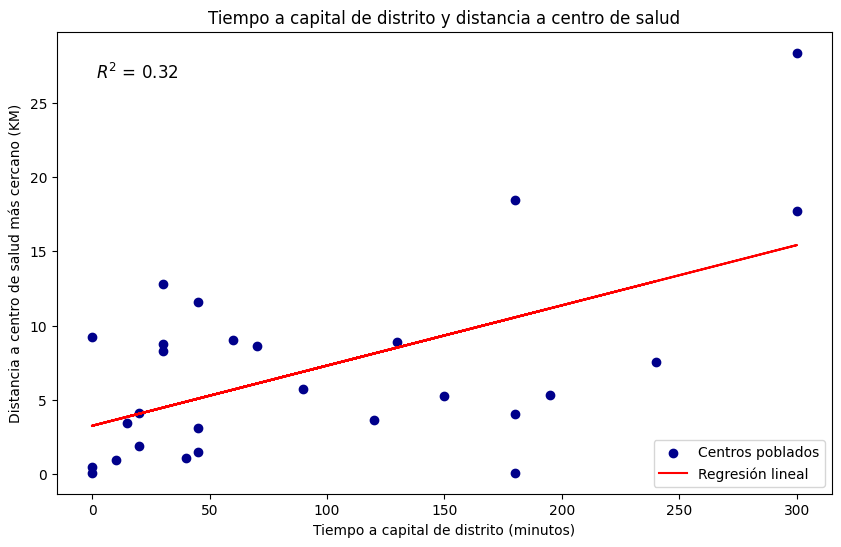

In [11]:
# Regresión lineal
from scipy.stats import linregress

x = datos_df['time_cap']
y = datos_df['dist_salud']

# Ajustar una regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(x, y)
r_squared = r_value ** 2  # Calcular R²

# Crear scatterplot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x, y, color='darkblue', label="Centros poblados")
ax.plot(x, slope*x + intercept, color='red', label="Regresión lineal")  # Línea de tendencia

# Agregar título y etiquetas
ax.set_title('Tiempo a capital de distrito y distancia a centro de salud')
ax.set_xlabel('Tiempo a capital de distrito (minutos)')
ax.set_ylabel('Distancia a centro de salud más cercano (KM)')

# Mostrar R² en el gráfico
ax.text(0.05, 0.9, f"$R^2$ = {r_squared:.2f}", transform=ax.transAxes, fontsize=12, color='black')

# Mostrar leyenda
ax.legend()

plt.show()
